In [8]:
# !pip install matplotlib
# !pip install seaborn
# !pip install wordcloud
# !pip install numpy
# !pip install pandas

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

DATA_PATH = './data/' #데이터경로 설정
print('파일 크기: ')
for file in os.listdir(DATA_PATH):
  if 'txt' in file:
    print(file.ljust(30)+str(round(os.path.getsize(DATA_PATH+ file) / 100000,2))+'MB')

파일 크기: 
ANSI0623_최종.txt               8.91MB
ratings.txt                   195.15MB
ratings_test.txt              48.93MB
ratings_train.txt             146.29MB


In [4]:
#트레인 파일 불러오기
train_data1 = pd.read_csv(DATA_PATH + 'ratings_train.txt',header = 0, delimiter = '\t', quoting=3)
train_data1.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [5]:
#트레인2 파일 불러오기
train_data2 = pd.read_csv(DATA_PATH + '/csv/DS01.csv')
train_data2.head()

,id,document,label
0,NaN,언니 동생으로 부르는게 맞는 일인가요..??,0
1,NaN,그냥 내 느낌일뿐겠지?,0
2,NaN,아직너무초기라서 그런거죠?,0
3,NaN,유치원버스 사고 낫다던데,0
4,NaN,근데 원래이런거맞나요,0


In [6]:
#test 파일 불러오기
test_data1 = pd.read_csv(DATA_PATH + 'ratings_test.txt',header = 0, delimiter = '\t', quoting=3)
test_data1.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [7]:
test_data2 = pd.read_csv(DATA_PATH + './csv/ANSI0623_최종.csv')
test_data2.head()

,id,document,label
0,@prollymiss4953,"제가 제일 좋아하는 때껄룩님 플리로 시작하네요 ,, ♡ 요즘 학업이 너무 힘들고 많...",1
1,@thedailyvibe247,This playlist is the perfect accompaniment for...,1
2,@TokyoChill87,Billions of people.. yet we're still alone lis...,1
3,@cloverfield-,I’m sitting outside at the recovery home I’m a...,1
4,@user-vw4rn7vt7z,역시 떼껄룩 레전드는 드라이브임.. 몇년이 지나도 드라이브 플리 노래들은 꼭꼭 듣는...,1


In [8]:
# 네이버 영화 리뷰 + 네이버 쇼핑몰 리뷰 + 유튜브 음악 리뷰 합치기
data= pd.concat([train_data1,train_data2,test_data1, test_data2])
print(data)

                    id                                           document  \
0              9976970                                아 더빙.. 진짜 짜증나네요 목소리   
1              3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나   
2             10265843                                  너무재밓었다그래서보는것을추천한다   
3              9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정   
4              6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...   
...                ...                                                ...   
4291           @jinak7                                 야근하면서 듣습니다..  화이팅!   
4292  @user-lu4pb4np1z  근데 댓글이 1000개 가까이 되는데 꾸준히 댓글 하나하나에 좋아요 눌러주시는 유튜...   
4293  @user-ep5yx8vw1p    마주오는 무리들앞에 혼자 서 있다는 두려움이 일때 누군가 뒤에 서 있는 기분 참 좋타   
4294  @user-rw6sg1xy4f                         나는 매우 느꼈다 감동을당신의 노래 정말 좋다    
4295  @user-ef4bi2cm3g                                          잘 들었읍니다..   

      label  
0         0  
1         1  
2         0  
3         0  
4    

In [10]:
# # csv 형태로 저장합니다.
# data.to_csv('../text_mining/총데이터.csv')

In [7]:
# !pip install -U scikit-learn
# import pandas as pd

# df = pd.DataFrame(data, columns=['document'])
# print(df)

In [8]:
# df2 = df.columns.values.tolist() + df.values.tolist()
# print(df2)

In [9]:
# pd['document'].str.replace('영화',' ',)

In [20]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 196587
테스트용 리뷰의 개수 : 21843


In [12]:
#리뷰 전체길이 확인
train_length = train_data['document'].astype(str).apply(len)
train_length.head()

55108    11
13644    51
44286     5
39144    35
55080    31
Name: document, dtype: int64

In [13]:
#리뷰 통계 정보
print('최댓값: {}'.format(np.max(train_length)))
print('최솟값: {}'.format(np.min(train_length)))
print('평균값: {:.2f}'.format(np.mean(train_length)))
print('표준편차: {:.2f}'.format(np.std(train_length)))
print('중간값: {}'.format(np.median(train_length)))
print('제1사분위: {}'.format(np.percentile(train_length,25)))
print('제3사분위: {}'.format(np.percentile(train_length,75)))

최댓값: 4073
최솟값: 1
평균값: 35.39
표준편차: 34.97
중간값: 26.0
제1사분위: 16.0
제3사분위: 42.0


In [14]:
# 문자열 아닌 데이터 모두 제거
train_review = [review for review in train_data['document'] if type(review) is str]
train_review

['그냥저냥 볼만한데..',
 '별점이 높을만 하다! 스포츠 관련 영화는 안보는데 끌려서 봤더니.. 내 감 아직 안죽었어ㅠ!',
 '재밋다 ㅋ',
 '갠찬았는데.. 어떻게보면 싸이코같지만, 많은생각을갖게만드는 영화',
 '전체적인 구성은 좋았지만 세밀한 디테일이 좀 부족한 영화',
 '이렇게 살고.. 싶네요`~! ㅋ 현실의 나와 .. 저 달나라의 나~! 네기시는 싫타 하지만.. 너무너무 부러워',
 '모든 걸 담으려다 넘쳐 흐름. 과유불급이라.',
 '멋진영화....탐의 젊은날이라...',
 '수준이 떨어지는 영화이다',
 '부모님과 너무 즐거운 시간이었습니다.',
 '완전 별로진짜 왜만들었져??',
 '2015년 4월 25일 서울 아트시네마에서 보고왔습니다. 영화는.. 당연히 좋았습니다. 프랑스 6.8혁명 이후의 일을 네 사람의 사랑이야기를 중심으로 전개한 걸작으로, 젊은이들의 방황과 쓸쓸함을 아련한 흑백필름에 담아낸 걸작입니다.',
 '이게 진정 최고의 영화 ~ ㅋㅋㅋㅋ우울하거나 삶에 재미가 없을 땐 강추!!',
 '코미디 영화를 작품성 따지는 바보들이 있네~ 스티븐 ssibal~ 얼마나 웃겨?',
 '진짜... 확실히 깨닫는게 있긴 있었어. 한국 애니메이션이나 만화의 길은 정말 가망이 없다는 것.. 몽상에 빠져 허우적대는 지긋지긋한 청춘타령. 그만하자.',
 '선수들의 팀웍에 감동했고 성적에 한번더감탄했습니다.',
 '아,, 형용할 수없는 지브리의 감성 이거 어쩔꺼야 ㅠㅠㅠ',
 '넘비싸~~~제2에 한화사태가 우려된다',
 '정말 제목 그대로 창피해...',
 '이런 지.럴맞은 영화는 뭐야. 안믿으면 다 타죽어라인가. 공포종교선전용이네',
 '조카들이 좋아하더군',
 '원작과 관계 여부를 떠나서 작품이라고 하기 어려운 이것에겐 4점이 적당하다. 한 시간을 봤지만 어느 순간도 나를 두근거리게 하지 못했다. 이건 영화가 아니라 비쥬얼 노벨일뿐',
 '1점도 아까운 영화는 오랜만이네',
 '이런 OOO기 영화는 내가 태어나서 첨이다.',
 '저도 아랬분말에 동

In [15]:
# 문자열 아닌 데이터 모두 제거
test_review = [review for review in test_data['document'] if type(review) is str]

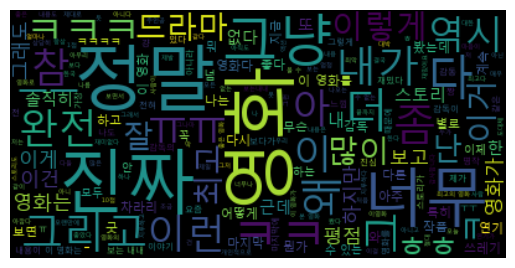

In [16]:
# 한글 폰트 설정(.ttf파일 다운로드 후 실행)
wordcloud = WordCloud('./data/'+'malgun.ttf').generate(' '.join(train_review))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
#긍정 1, 부정 0
print('긍정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 갯수: {}'.format(train_data['label'].value_counts()[0]))

긍정 리뷰 갯수: 98543
부정 리뷰 갯수: 98042


### 데이터 전처리
1. 정규화로 한국어만 남기기

2. 형태소 분석기로 어간 추출하기

3. 불용어 제거하기

4. 문자를 인덱스벡터로 전환하기

5. 패딩처리하기

In [36]:
# !pip install konlpy
# !pip install tensorflow
# !pip install keras

In [54]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

DATA_PATH = './data/' # 데이터 경로 설정
train_data = pd.read_csv(DATA_PATH+'ratings_train.txt', header = 0, delimiter='\t', quoting=3)

train_data['document'][:5]

0                                  아 더빙.. 진짜 짜증나네요 목소리
1                    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                        교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
Name: document, dtype: object

In [55]:
#전처리 함수 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words =[]):
  #함수인자설명
  # review: 전처리할 텍스트
  # okt: okt객체를 반복적으로 생성하지 않고 미리 생성 후 인자로 받음
  # remove_stopword: 불용어를 제거할지 여부 선택. 기본값 False
  # stop_words: 불용어 사전은 사용자가 직접 입력, 기본값 빈 리스트

  # 1. 한글 및 공백 제외한 문자 모두 제거
  review_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]','',review)
  review_text = re.sub(r'[^ A-Za-z]', '', review) #특수기호 제거, 정규 표현식  
  
  #2. okt 객체를 활용하여 형태소 단어로 나눔
  word_review = okt.morphs(review_text,stem=True)

  if remove_stopwords:
    #3. 불용어 제거(선택)
    word_review = [token for token in word_review if not token in stop_words]
  return word_review

In [26]:
print('JAVA_HOME' in os.environ)

False


In [27]:
os.environ['JAVA_HOME'] = r'C:\Program Files\Java\jdk-20\bin\server'

In [28]:
print('JAVA_HOME' in os.environ)

True


In [56]:
# 전체 텍스트 전처리
stop_words = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한']
okt = Okt()
clean_train_review = []

for review in train_data['document']:
  # 리뷰가 문자열인 경우만 전처리 진행
  if type(review) == str:
    clean_train_review.append(preprocessing(review,okt,remove_stopwords=True,stop_words= stop_words))
  else:
    clean_train_review.append([]) #str이 아닌 행은 빈칸으로 놔두기

clean_train_review[:4]

[[], [], [], []]

In [57]:
#테스트 리뷰도 동일하게 전처리
test_data = pd.read_csv(DATA_PATH + 'ratings_test.txt', header = 0, delimiter='\t', quoting=3)
# test_data 


clean_test_review = []
for review in test_data['document']:
  if type(review) == str:
    clean_test_review.append(preprocessing(review, okt, remove_stopwords=True, stop_words=stop_words))
  else:
    clean_test_review.append([])
  
clean_test_review[:4]

[[], ['GDNTOPCLASSINTHECLUB'], [], []]

In [59]:
# 인덱스 벡터 변환 후 일정 길이 넘어가거나 모자라는 리뷰 패딩처리
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)

word_vocab = tokenizer.word_index #단어사전형태
MAX_SEQUENCE_LENGTH = 35 #문장 최대 길이

#학습 데이터
train_inputs = pad_sequences(train_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')

#학습 데이터 라벨 벡터화
train_labels = np.array(train_data['label'])

#평가 데이터 
test_inputs = pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH,padding='post')
#평가 데이터 라벨 벡터화
test_labels = np.array(test_data['label'])

 전처리 완료된 데이터 넘파이 파일로 저장

In [60]:
DEFAULT_PATH  = './data' # 경로지정
# DEFAULT_PATH  = './data/content/sample_data/' # 경로지정
DATA_PATH = './data/content/sample_data/CLEAN_DATA/' #.npy파일 저장 경로지정
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs={}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

#전처리한 데이터들 파일로저장
import os

if not os.path.exists(DEFAULT_PATH + DATA_PATH):
  os.makedirs(DEFAULT_PATH+DATA_PATH)

#전처리 학습데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_INPUT_DATA,'wb'),train_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TRAIN_LABEL_DATA,'wb'),train_labels)
#전처리 테스트데이터 넘파이로 저장
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_INPUT_DATA,'wb'),test_inputs)
np.save(open(DEFAULT_PATH+DATA_PATH+TEST_LABEL_DATA,'wb'),test_labels)

#데이터 사전 json으로 저장
json.dump(data_configs,open(DEFAULT_PATH + DATA_PATH + DATA_CONFIGS,'w'),ensure_ascii=False)

학습하기

In [45]:
# !pip install tqdm

In [61]:
# 학습 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

#전처리 데이터 불러오기
# DATA_PATH = '/content/sample_data/CLEAN_DATA/'
DATA_PATH = './data/data/content/sample_data/CLEAN_DATA/'
DATA_OUT = './data/content/sample_data/DATA_OUT/'
INPUT_TRAIN_DATA = 'nsmc_test_input.npy'
LABEL_TRAIN_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

train_input = np.load(open(DATA_PATH + INPUT_TRAIN_DATA,'rb'))
train_input = pad_sequences(train_input,maxlen=train_input.shape[1])
train_label = np.load(open(DATA_PATH + LABEL_TRAIN_DATA,'rb'))
prepro_configs = json.load(open(DATA_PATH+DATA_CONFIGS,'r'))

### 파라미터 세팅하기

In [49]:
# from sklearn.model_selection import train_test_split
# train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
# # print('훈련용 리뷰의 개수 :', len(train_data))
# # print('테스트용 리뷰의 개수 :', len(test_data))

In [65]:
model_name= 'cnn_classifier_kr'
BATCH_SIZE = 100
NUM_EPOCHS = 100
VALID_SPLIT = 0.2
MAX_LEN = train_input.shape[1]

kargs={'model_name': model_name, 'vocab_size':prepro_configs['vocab_size'],'embbeding_size':128, 'num_filters':100,'dropout_rate':0.5, 'hidden_dimension':250,'output_dimension':1}

모델 함수 만들기

In [66]:
class CNNClassifier(tf.keras.Model):

  def __init__(self, **kargs):
    super(CNNClassifier, self).__init__(name=kargs['model_name'])
    self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], output_dim=kargs['embbeding_size'])
    self.conv_list = [layers.Conv1D(filters=kargs['num_filters'], kernel_size=kernel_size, padding='valid',activation = tf.keras.activations.relu,
                                    kernel_constraint = tf.keras.constraints.MaxNorm(max_value=3)) for kernel_size in [3,4,5]]
    self.pooling = layers.GlobalMaxPooling1D()
    self.dropout = layers.Dropout(kargs['dropout_rate'])
    self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                            activation = tf.keras.activations.relu,
                            kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    self.fc2 = layers.Dense(units=kargs['output_dimension'],
                            activation=tf.keras.activations.sigmoid,
                            kernel_constraint= tf.keras.constraints.MaxNorm(max_value=3.))
    

  def call(self,x):
    x = self.embedding(x)
    x = self.dropout(x)
    x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis = 1)
    x = self.fc1(x)
    x = self.fc2(x)
    return x

In [67]:
from tensorflow.keras.models import save_model

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy')])

#검증 정확도를 통한 EarlyStopping 기능 및 모델 저장 방식 지정
# earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=2)
checkpoint_path = DATA_OUT + model_name +'\weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} -- Folder create complete \n".format(checkpoint_dir))

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor = 'val_accuracy', verbose=1, save_best_only = True,
    save_weights_only=True
)

# history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
#                     validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

history = model.fit(train_input, train_label, batch_size=BATCH_SIZE, epochs = NUM_EPOCHS,
                    validation_split=VALID_SPLIT, callbacks=[cp_callback])
# 모델 저장하기
save_model(model,'../AI/data/SaveModel/')

./data/content/sample_data/DATA_OUT/cnn_classifier_kr -- Folder already exists 

Epoch 1/100
400/400 [==============================] - ETA: 0s - loss: 0.6911 - accuracy: 0.5081
Epoch 1: val_accuracy improved from -inf to 0.50770, saving model to ./data/content/sample_data/DATA_OUT/cnn_classifier_kr\weights.h5
400/400 [==============================] - 10s 23ms/step - loss: 0.6911 - accuracy: 0.5081 - val_loss: 0.6900 - val_accuracy: 0.5077
Epoch 2/100
399/400 [============================>.] - ETA: 0s - loss: 0.6866 - accuracy: 0.5191
Epoch 2: val_accuracy improved from 0.50770 to 0.50840, saving model to ./data/content/sample_data/DATA_OUT/cnn_classifier_kr\weights.h5
400/400 [==============================] - 9s 22ms/step - loss: 0.6866 - accuracy: 0.5191 - val_loss: 0.6882 - val_accuracy: 0.5084
Epoch 3/100
400/400 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.5223
Epoch 3: val_accuracy did not improve from 0.50840
400/400 [==============================] 

INFO:tensorflow:Assets written to: ../AI/data/SaveModel/assets


INFO:tensorflow:Assets written to: ../AI/data/SaveModel/assets


평가하기

In [68]:
# INPUT_TEST_DATA = './data/content/sample_data/CLEAN_DATA/nsmc_test_input.npy'
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'
SAVE_FILE_NM = 'weights.h5'

test_input = np.load(open(DATA_PATH+INPUT_TEST_DATA,'rb'))
test_input = pad_sequences(test_input,maxlen=test_input.shape[1])
test_label_data = np.load(open(DATA_PATH + LABEL_TEST_DATA, 'rb'))

model.load_weights('./data/content/sample_data/DATA_OUT/cnn_classifier_kr/weights.h5')
model.evaluate(test_input, test_label_data)

1563/1563 [==============================] - 4s 3ms/step - loss: 0.6851 - accuracy: 0.5205


[0.6850959658622742, 0.5204799771308899]

In [69]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


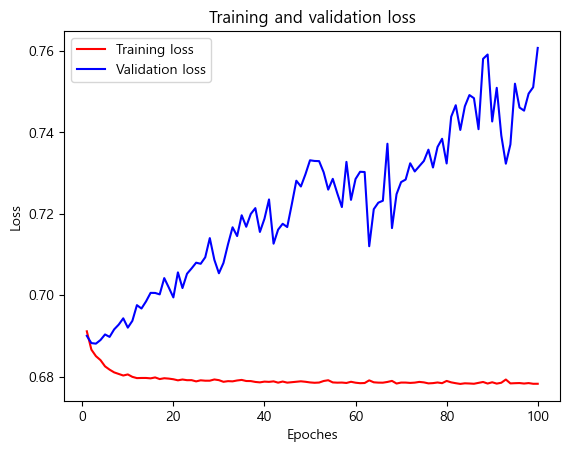

In [70]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 예측하기
저장된 학습모델을 가지고 새로운 문장이 있을 때 그 문장이 긍정인지 부정인지 예측

In [71]:
DATA_PATH = './data/data/content/sample_data/CLEAN_DATA/'

In [79]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
okt = Okt()
tokenizer  = Tokenizer()

# DATA_CONFIGS = 'C:\Users\Administrator\Downloads\Window23-main\AI\data\data\content\sample_data\CLEAN_DATA\data_configs.json'
DATA_CONFIGS = './data/data/content/sample_data/CLEAN_DATA/data_configs.json'
prepro_configs = json.load(open(DATA_CONFIGS,'r'))
prepro_configs['vocab'] = word_vocab

tokenizer.fit_on_texts(word_vocab)

MAX_LENGTH = 15 #문장최대길이

sentence = input('감성분석할 문장을 입력해 주세요.: ')
sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣\\s ]','', sentence)
stopwords = ['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'] # 불용어 추가할 것이 있으면 이곳에 추가
sentence = okt.morphs(sentence, stem=True) # 토큰화
sentence = [word for word in sentence if not word in stopwords] # 불용어 제거
vector  = tokenizer.texts_to_sequences(sentence)
pad_new = pad_sequences(vector, maxlen = MAX_LENGTH) # 패딩

model.load_weights('./data/content/sample_data/DATA_OUT/cnn_classifier_kr/weights.h5') #모델 불러오기
predictions = model.predict(pad_new)
predictions = float(predictions.squeeze(-1)[1])

if(predictions > 0.5):
  print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(predictions * 100))
else:
  print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - predictions) * 100))

1/1 [==============================] - 0s 15ms/step
51.05% 확률로 긍정 리뷰입니다.

